In [157]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


In [158]:
df1 = pd.read_csv('Players.csv')
df2 = pd.read_csv('Seasons_Stats.csv') 

In [159]:
df1.shape

(3922, 8)

In [160]:
df2.shape

(24691, 53)

In [161]:
df1.isnull().sum()

Unnamed: 0       0
Player           1
height           1
weight           1
collage        349
born             1
birth_city     470
birth_state    483
dtype: int64

In [162]:
dfclean = df1.drop(columns=['birth_city', 'birth_state', 'collage'])

In [163]:
dfclean.head()

,Unnamed: 0,Player,height,weight,born
0,0,Curly Armstrong,180.0,77.0,1918.0
1,1,Cliff Barker,188.0,83.0,1921.0
2,2,Leo Barnhorst,193.0,86.0,1924.0
3,3,Ed Bartels,196.0,88.0,1925.0
4,4,Ralph Beard,178.0,79.0,1927.0


In [164]:
dfclean = df1.fillna(df1['height'].mode()[0])

In [165]:
df2.isnull().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [166]:
df2 = df2.rename(columns = {'Unnamed: 0':'ID'})

In [167]:
dfclean = dfclean.rename(columns = {'Unnamed: 0':'ID'})

In [168]:
df2 = df2.drop(columns = ['blanl', 'blank2', 'STL', 'BLK', 'TOV', '3P', '3PA', '3P%', 'OBPM', 'DBPM', 'BPM', 'VORP', 'GS', '3PAr'])

In [169]:
df2 = df2.drop(columns=['ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'ORB', 'DRB'])

In [170]:
df2 = df2.drop(columns=['Tm', 'MP', 'PER',
       'TS%', 'FTr', 'OWS', 'DWS', 'WS', 'WS/48', 'FG', 'FGA', 'FG%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'PF', 'Player'])

In [171]:
df2.head()

,ID,Year,Pos,Age,G,PTS
0,0,1950.0,G-F,31.0,63.0,458.0
1,1,1950.0,SG,29.0,49.0,279.0
2,2,1950.0,SF,25.0,67.0,438.0
3,3,1950.0,F,24.0,15.0,63.0
4,4,1950.0,F,24.0,13.0,59.0


In [172]:
df = pd.merge(dfclean, df2, on='ID', how='left')

In [173]:
df = df.drop(columns = ['born', 'Year'])

In [174]:
df = df.drop(columns = ['birth_city', 'birth_state', 'collage'])

In [175]:
df.isnull().sum()

ID         0
Player     0
height     0
weight     0
Pos       24
Age       32
G         24
PTS       24
dtype: int64

In [176]:
df.shape

(3922, 8)

In [177]:
df['PTS'] = df['PTS'].fillna(df['PTS'].mode()[0])

In [178]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [179]:
df['Pos'] = df['Pos'].fillna(df['Pos'].mode()[0])

In [180]:
df['Pos'].value_counts()

SF       740
SG       713
PF       683
C        656
PG       596
G        139
F        123
F-C       81
G-F       79
F-G       60
C-F       35
C-PF       6
SF-SG      3
PF-C       2
PF-SF      2
SG-SF      1
SF-PF      1
SG-PG      1
SF-PG      1
Name: Pos, dtype: int64

In [186]:
df.head()

,ID,Player,height,weight,Pos,Age,G,PTS
0,0,Curly Armstrong,180.0,77.0,G-F,31.0,63.0,458.0
1,1,Cliff Barker,188.0,83.0,SG,29.0,49.0,279.0
2,2,Leo Barnhorst,193.0,86.0,SF,25.0,67.0,438.0
3,3,Ed Bartels,196.0,88.0,F,24.0,15.0,63.0
4,4,Ralph Beard,178.0,79.0,F,24.0,13.0,59.0


In [187]:
df.dtypes

ID          int64
Player     object
height    float64
weight    float64
Pos        object
Age       float64
G         float64
PTS       float64
dtype: object

In [188]:
df['Pos'].astype(str)

0       G-F
1        SG
2        SF
3         F
4         F
       ... 
3917     SF
3918     SG
3919     SG
3920     SG
3921     SG
Name: Pos, Length: 3922, dtype: object

In [189]:
df['PTS'].astype(int)

0       458
1       279
2       438
3        63
4        59
       ... 
3917    106
3918    559
3919    101
3920     74
3921     27
Name: PTS, Length: 3922, dtype: int64

In [210]:
df.corr()

,Age,G,PTS
Age,1.000000,0.135283,0.163705
G,0.135283,1.000000,0.711181
PTS,0.163705,0.711181,1.000000


In [215]:
dfclean = df.drop(columns = ['Player'])
dfclean = pd.get_dummies(df['Pos'])

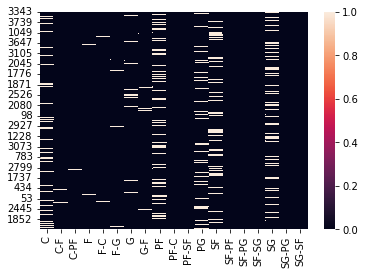

In [217]:
sns.heatmap(dfclean)

In [191]:
df = df.drop(columns = ['ID', 'height', 'weight'])

In [231]:
from sklearn.utils import shuffle
k = int(input())
options = ['PG', 'SF', 'SG', 'PF', 'C']
for i in range (0, 5):
  df = shuffle(df)
  rslt_df = df.loc[(df['PTS'] <= k//5) & (df['PTS'] >= k//5.4) & (df['Pos'].isin(options))]
  rslt_df = shuffle(rslt_df)
  if i == 4:
    break
print(rslt_df)
  

4000
                  Player Pos   Age     G    PTS
1140     Adrian Dantley*  PF  34.0  71.0  762.0
3371     Wesley Matthews  SF  31.0  79.0  746.0
3853         Joel Embiid  SF  26.0  74.0  759.0
867       Garfield Smith  PG  31.0  71.0  751.0
15         Frankie Brian   C  27.0  61.0  779.0
...                  ...  ..   ...   ...    ...
3276      Mario Chalmers  SF  25.0  82.0  786.0
1482          Joe Cooper   C  22.0  73.0  773.0
686         Neil Johnson  PG  24.0  71.0  794.0
941       Charles Dudley  PG  26.0  68.0  774.0
1222  Richard Washington  PG  25.0  72.0  787.0

[120 rows x 5 columns]
